In [1]:
import os
import math
import sys

In [2]:
import numpy as np
import scipy
import pandas as pd

In [3]:
from collections import Counter

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
import statsmodels
import sklearn

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB ## Naive Bayes
from sklearn.linear_model import LogisticRegression

In [77]:
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix 
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [12]:
os.getcwd()

'/home/asangar/backblaze-resampling/code/notebooks'

In [13]:
#dpath = 'C:/connect/py/jupx/hd_data/latest2018/2018_01'
# ALL
#dpath = 'C:\\Users\\asangar\\Music\\data_science_lab\\py\\jupx\\hd_data\\all_2018'
#dpath = 'C:/connect/py/jupx/hd_data/latest2018/2018_01'
#dpath = '/home/asangar/hdd/data'
dpath = '/home/asangar/backblaze-resampling/code/data/interim'

In [14]:
os.chdir(dpath)

### Get the list of files

In [15]:
dlist = os.listdir(dpath)

In [16]:
print (dlist) #dlist.sort()

['.gitkeep', 'westDigital.csv', 'wd_dropped_cols.csv', 'wd_dropped_normalized.csv', 'wd_dropped_NA.csv', 'wd2017_dropped_normalized.csv', 'westD_2017Q1_droppednormalized.csv', 'sgt_2017Q1_droppednormalized.csv', 'toshiba_2017Q1_droppednormalized.csv', 'hitachi_2017Q1_droppednormalized.csv']


## Importing Seagate dataset

In [17]:
dataframe1 = pd.read_csv(('sgt_2017Q1_droppednormalized.csv'))
#dataframe1 = pd.read_csv(('toshiba_2017Q1_droppednormalized.csv'))

In [18]:
dataframe1.shape

(4098269, 31)

In [19]:
dataframe1.groupby('failure').count()

,Unnamed: 0,date,serial_number,model,capacity_bytes,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_183_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_195_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
failure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4097956,4097956,4097956,4097956,4097956,4097536,4097536,4097536,4097536,4097536,4097536,4097536,4097536,3167146,4027441,4027441,4027441,4027441,4027441,4089381,4089381,4019286,4097536,1116552,4097536,4097536,4097536,4020991,4020991,4020991
1,313,313,313,313,313,313,313,313,313,313,313,313,313,286,311,311,311,311,311,312,312,310,313,46,313,313,313,311,311,311


In [20]:
dataframe1.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_183_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_195_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,4,2017-01-01,Z305B2QN,ST4000DM000,4000787030016,0,58173272.0,0.0,8.0,0.0,388359773.0,9195.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,33904.0,24.0,NaN,0.0,0.0,0.0,8947.0,3.078054e+10,8.290869e+09
1,7,2017-01-01,Z302A0YH,ST4000DM000,4000787030016,0,75626904.0,0.0,19.0,0.0,785458463.0,17043.0,0.0,19.0,0.0,0.0,0.0,1.0,0.0,19.0,0.0,0.0,39656.0,19.0,NaN,0.0,0.0,0.0,16788.0,2.164812e+10,1.620139e+11
2,8,2017-01-01,Z305BT0W,ST4000DM000,4000787030016,0,48893128.0,0.0,7.0,0.0,316494047.0,7857.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,9073.0,30.0,NaN,0.0,0.0,0.0,7771.0,2.616829e+10,1.589215e+10
3,9,2017-01-01,ZA130TTW,ST8000DM002,8001563222016,0,199683560.0,0.0,1.0,0.0,511172192.0,2245.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,27.0,12799.0,0.0,395.0,27.0,199683560.0,0.0,0.0,0.0,2214.0,1.831791e+10,4.279721e+09
4,11,2017-01-01,ZA13YGB1,ST8000DM002,8001563222016,0,233028000.0,0.0,2.0,0.0,269301252.0,806.0,0.0,2.0,NaN,0.0,0.0,0.0,0.0,39.0,954.0,0.0,423.0,39.0,233028000.0,0.0,0.0,0.0,774.0,3.999039e+09,1.701373e+09


In [21]:
dataframe1.drop(columns = ["Unnamed: 0"], axis=1, inplace=True)

In [22]:
dataframe1.isnull().sum()

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_raw           420
smart_3_raw           420
smart_4_raw           420
smart_5_raw           420
smart_7_raw           420
smart_9_raw           420
smart_10_raw          420
smart_12_raw          420
smart_183_raw      930837
smart_184_raw       70517
smart_187_raw       70517
smart_188_raw       70517
smart_189_raw       70517
smart_190_raw       70517
smart_191_raw        8576
smart_192_raw        8576
smart_193_raw       78673
smart_194_raw         420
smart_195_raw     2981671
smart_197_raw         420
smart_198_raw         420
smart_199_raw         420
smart_240_raw       76967
smart_241_raw       76967
smart_242_raw       76967
dtype: int64

In [23]:
dataframe1.isnull().sum()/len(dataframe1)*100

date               0.000000
serial_number      0.000000
model              0.000000
capacity_bytes     0.000000
failure            0.000000
smart_1_raw        0.010248
smart_3_raw        0.010248
smart_4_raw        0.010248
smart_5_raw        0.010248
smart_7_raw        0.010248
smart_9_raw        0.010248
smart_10_raw       0.010248
smart_12_raw       0.010248
smart_183_raw     22.712931
smart_184_raw      1.720653
smart_187_raw      1.720653
smart_188_raw      1.720653
smart_189_raw      1.720653
smart_190_raw      1.720653
smart_191_raw      0.209259
smart_192_raw      0.209259
smart_193_raw      1.919664
smart_194_raw      0.010248
smart_195_raw     72.754399
smart_197_raw      0.010248
smart_198_raw      0.010248
smart_199_raw      0.010248
smart_240_raw      1.878037
smart_241_raw      1.878037
smart_242_raw      1.878037
dtype: float64

## Start Preprocessing here...

In [24]:
df2 = dataframe1.drop(['date','serial_number','model','capacity_bytes', 'smart_183_raw', 'smart_195_raw'], 1)

In [25]:
df2.head()

,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,0,58173272.0,0.0,8.0,0.0,388359773.0,9195.0,0.0,8.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,33904.0,24.0,0.0,0.0,0.0,8947.0,3.078054e+10,8.290869e+09
1,0,75626904.0,0.0,19.0,0.0,785458463.0,17043.0,0.0,19.0,0.0,0.0,1.0,0.0,19.0,0.0,0.0,39656.0,19.0,0.0,0.0,0.0,16788.0,2.164812e+10,1.620139e+11
2,0,48893128.0,0.0,7.0,0.0,316494047.0,7857.0,0.0,7.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,9073.0,30.0,0.0,0.0,0.0,7771.0,2.616829e+10,1.589215e+10
3,0,199683560.0,0.0,1.0,0.0,511172192.0,2245.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0,12799.0,0.0,395.0,27.0,0.0,0.0,0.0,2214.0,1.831791e+10,4.279721e+09
4,0,233028000.0,0.0,2.0,0.0,269301252.0,806.0,0.0,2.0,0.0,0.0,0.0,0.0,39.0,954.0,0.0,423.0,39.0,0.0,0.0,0.0,774.0,3.999039e+09,1.701373e+09


In [26]:
df2_without_failure = df2.drop(columns = ['failure'], axis=1)

### Normalizing

In [27]:
mms = MinMaxScaler()
cols = df2_without_failure.keys()
normalized_data = pd.DataFrame(mms.fit_transform(df2_without_failure), columns= cols)
normalized_data.head()

,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,0.238278,0.0,0.000262,0.0,1.379748e-06,0.144892,0.0,0.000487,0.0,0.0,0.000000e+00,0.0,0.279070,0.000000,0.0,0.069730,0.279070,0.0,0.0,0.0,3.178661e-11,0.446724,0.000256
1,0.309768,0.0,0.000675,0.0,2.790543e-06,0.268559,0.0,0.001157,0.0,0.0,5.173935e-12,0.0,0.162791,0.000000,0.0,0.081560,0.162791,0.0,0.0,0.0,5.964387e-11,0.314183,0.005010
2,0.200266,0.0,0.000225,0.0,1.124426e-06,0.123808,0.0,0.000426,0.0,0.0,0.000000e+00,0.0,0.418605,0.000000,0.0,0.018659,0.418605,0.0,0.0,0.0,2.760856e-11,0.379785,0.000491
3,0.817904,0.0,0.000000,0.0,1.816070e-06,0.035376,0.0,0.000061,0.0,0.0,0.000000e+00,0.0,0.348837,0.023274,0.0,0.000810,0.348837,0.0,0.0,0.0,7.865828e-12,0.265851,0.000132
4,0.954483,0.0,0.000037,0.0,9.567618e-07,0.012701,0.0,0.000122,0.0,0.0,0.000000e+00,0.0,0.627907,0.001735,0.0,0.000868,0.627907,0.0,0.0,0.0,2.749842e-12,0.058039,0.000053


In [28]:
normalized_data.shape

(4098269, 23)

In [29]:
normalized_data.describe()

,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
count,4.097849e+06,4.097849e+06,4.097849e+06,4.097849e+06,4.097849e+06,4.097849e+06,4.097849e+06,4.097849e+06,4.027752e+06,4.027752e+06,4.027752e+06,4.027752e+06,4.027752e+06,4.089693e+06,4.089693e+06,4.019596e+06,4.097849e+06,4.097849e+06,4.097849e+06,4.097849e+06,4.021302e+06,4.021302e+06,4.021302e+06
mean,4.905023e-01,1.130394e-02,2.761273e-04,6.889106e-05,9.073607e-05,2.217147e-01,2.098662e-05,4.726666e-04,1.030627e-04,4.487741e-05,1.304567e-04,1.768339e-04,3.395383e-01,4.013108e-03,1.434878e-03,5.327882e-02,3.396745e-01,2.416514e-05,2.416494e-05,2.164069e-04,2.337815e-02,4.114409e-01,2.395825e-03
std,2.943226e-01,8.623140e-02,4.614777e-03,5.389895e-03,8.123865e-03,1.365286e-01,4.581068e-03,4.614320e-03,5.729464e-03,1.129623e-03,9.019517e-03,1.016598e-02,1.449081e-01,1.777856e-02,8.780430e-03,8.326366e-02,1.441493e-01,7.777734e-04,7.777734e-04,1.150564e-02,1.225362e-01,1.262310e-01,1.399990e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.347748e-01,0.000000e+00,7.497938e-05,0.000000e+00,1.437899e-06,1.272908e-01,0.000000e+00,1.218175e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.325581e-01,0.000000e+00,0.000000e+00,5.520283e-03,2.325581e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.843280e-11,3.378940e-01,2.986706e-04
50%,4.901070e-01,0.000000e+00,1.499588e-04,0.000000e+00,1.893186e-06,1.914719e-01,0.000000e+00,3.045438e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.023256e-01,0.000000e+00,0.000000e+00,2.130574e-02,3.023256e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.287480e-11,4.131241e-01,5.456183e-04
75%,7.462228e-01,0.000000e+00,3.374072e-04,0.000000e+00,2.900030e-06,2.960401e-01,0.000000e+00,6.090876e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.186047e-01,0.000000e+00,6.711409e-04,7.102119e-02,4.186047e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.290990e-11,4.931997e-01,4.023770e-03
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Feature Selection Using Correlation Matrix

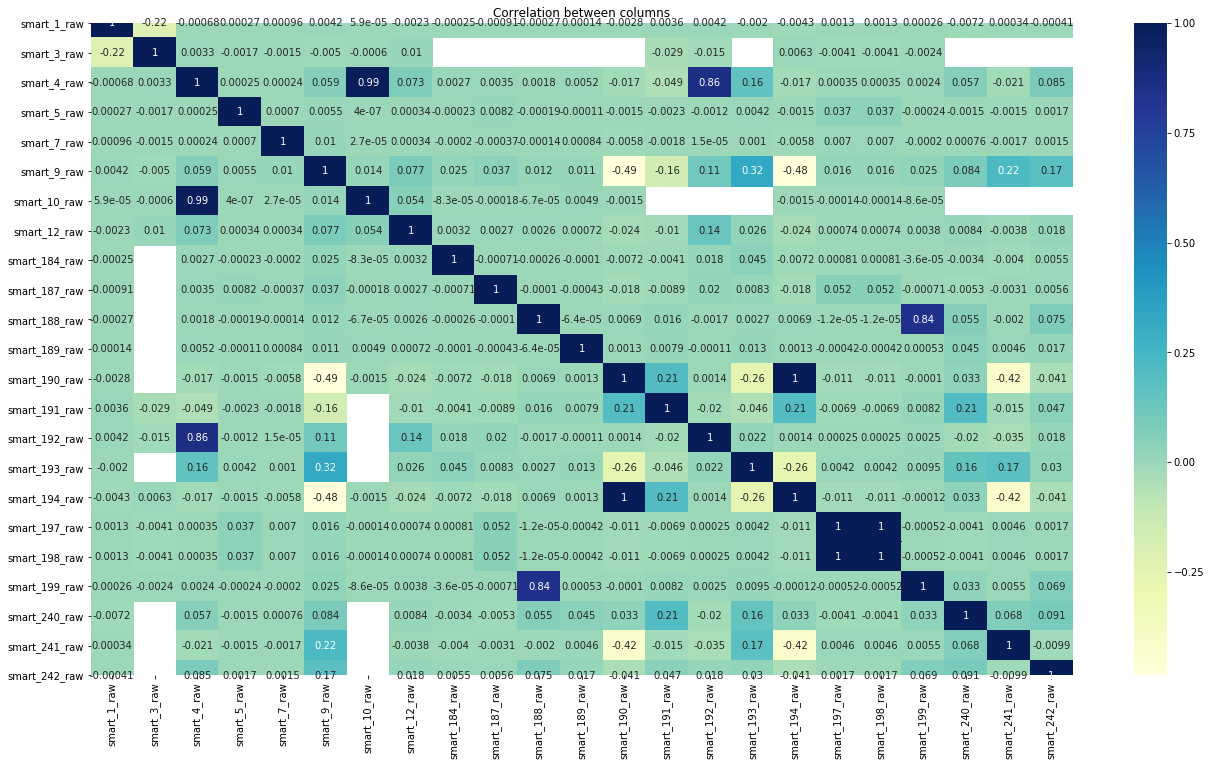

In [30]:
f,ax = plt.subplots(figsize=(22, 12))
ax = sns.heatmap(normalized_data.corr(), annot = True, cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Correlation between columns")
plt.show()

In [31]:
cols=['smart_10_raw', 'smart_192_raw', 'smart_194_raw', 'smart_197_raw', 'smart_199_raw']

In [32]:
nd = normalized_data.drop(columns = cols, axis=1)

In [33]:
nd['failure'] = df2['failure']

In [34]:
nd_notnull = nd.dropna(axis=0, how='any')

In [44]:
nd_notnull.shape

(4013232, 19)

In [35]:
y_Selected = nd_notnull['failure']

In [36]:
X_Selected = nd_notnull.drop(['failure'],axis=1)

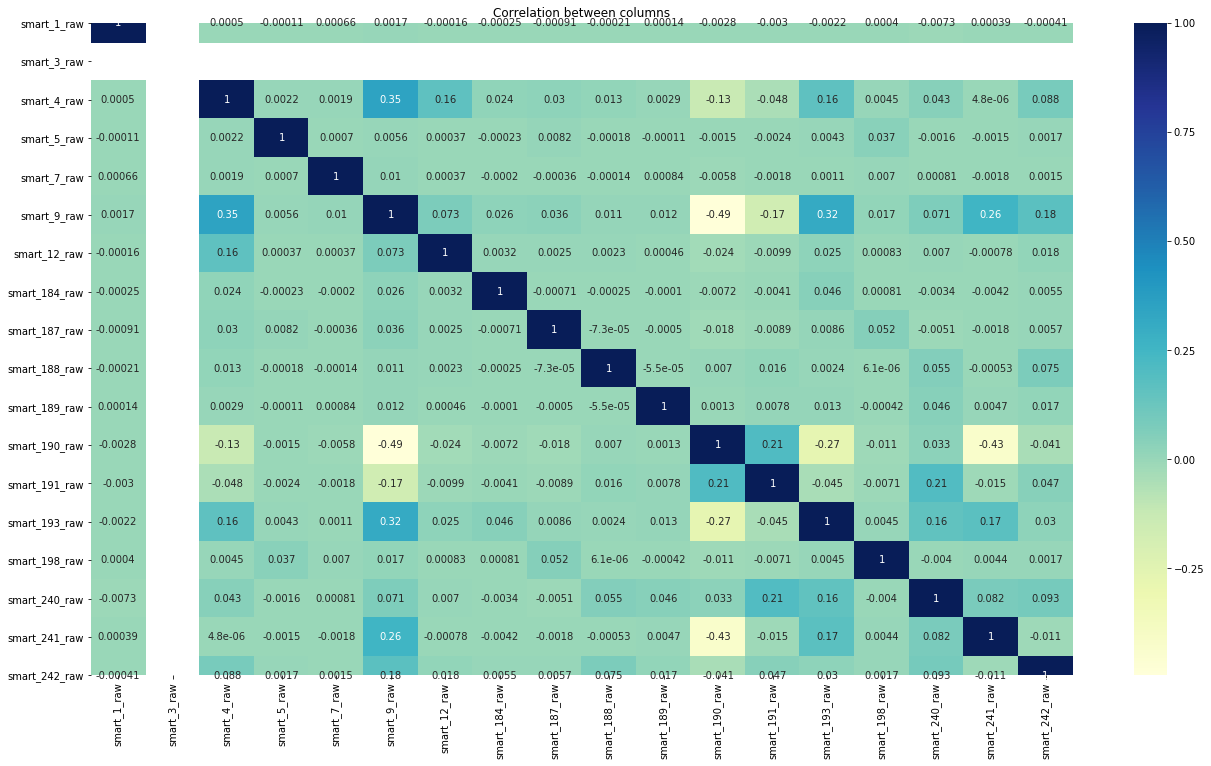

In [37]:
f,ax = plt.subplots(figsize=(22, 12))
ax = sns.heatmap(X_Selected.corr(), annot = True, cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Correlation between columns")
plt.show()

### Dropping Columns with Correlation Greater Than 80%

In [55]:
'''
corr_matrix = normalized_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
print("Droped Columns: {}".format(to_drop))

normalized = normalized_data.drop(normalized_data[to_drop], axis=1)
print(normalized.shape)
normalized.head()
'''

'\ncorr_matrix = normalized_data.corr().abs()\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))\nto_drop = [column for column in upper.columns if any(upper[column] > 0.80)]\nprint("Droped Columns: {}".format(to_drop))\n\nnormalized = normalized_data.drop(normalized_data[to_drop], axis=1)\nprint(normalized.shape)\nnormalized.head()\n'

### Functions for the Analysis

In [62]:
def plot_cm(cnf_matrix, normalize=False):
    cm = confusion_matrix(y_test, y_pred)
    # print(cm)
    ax = sns.heatmap(cm, annot=True, cbar=False, fmt='g', cmap=plt.cm.Oranges)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - .5)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix")

In [73]:
def plot_ROC(clf, X_test, y_test):    
    plt.style.use('ggplot')

    y_predict_probabilities = clf.predict_proba(X_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [67]:
def makeOverSamplesSMOTE(X,y):
    resampling = SMOTE()
    X_res, y_res = resampling.fit_resample(X, y)
    return X_res,y_res

In [68]:
def makeOverSamplesBorderlineSMOTE(X,y):
    resampling = BorderlineSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5, m_neighbors=10, kind='borderline-1')
    X_res, y_res = resampling.fit_resample(X, y)
    return X_res,y_res

In [69]:
def makeOverSamplesSVMSMOTE(X,y):
    resampling = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5, m_neighbors=10)
    X_res, y_res = resampling.fit_resample(X, y)
    return X_res,y_res

In [70]:
def makeOverSamplesADASYN(X,y):
    resampling = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
    X_res, y_res = resampling.fit_resample(X, y)
    return X_res,y_res

## ------------------------ Stratified K-Folds cross-validator --------------------

### Running K-fold (k=5) Cross Validation for each Classifier 

In [63]:
skFold = StratifiedKFold(n_splits=5)

In [64]:
print(skFold)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [65]:
skFold.get_n_splits(X, y)

5

### Feature Selection Using Recursive Feature Selection (RFE) by SMOTE, StratifiedKFold, and Random Forest Classifier

In [40]:
def Average(lst): 
    return sum(lst) / len(lst) 

# Create Cross Validator
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

F1_acc = []
bacc = []
votes = []
accs = []
support = []
for trainIndex, textIndex in skf.split(X_Selected, y_Selected):
    X_train, xTest = X_Selected.iloc[trainIndex], X_Selected.iloc[textIndex]
    y_train, yTest = y_Selected.iloc[trainIndex], y_Selected.iloc[textIndex]
    #---------------------------------------------
    #print("\nSMOTE")
    sm = SMOTE(random_state=12)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())
    #----------------------------------------------
    # create the RFE model and select 5 attributes
    #model = LogisticRegression(solver="liblinear", multi_class="auto")
    model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
    rfe = RFE(model, 8)
    rfe = rfe.fit(X_train_smote, y_train_smote.ravel())
    
    X_train_smote = rfe.transform( X_train_smote)
    xTest = rfe.transform(xTest)
    
    votes.append(rfe.ranking_)
    support.append(rfe.support_)
    
    # create a base classifier used to evaluate a subset of attributes
    a = model.fit(X_train_smote, y_train_smote.ravel())
    accs.append(model.score(xTest, np.ravel(yTest.values)))
    
    yPred = a.predict(xTest)
    cnf_matrix = confusion_matrix(yTest,yPred)
    F1_acc.append(f1_score(yTest, yPred, average="macro", labels=np.unique( yPred)))
    bacc.append(balanced_accuracy_score(yTest, yPred))
    
    print('Optimal number of features: {}'.format(rfe.n_features_))
    features = X_Selected.columns[rfe.get_support(indices=True)].tolist()
    print('Selected features: {}'.format(features))
    print('cnf matrix:\n {}'.format(cnf_matrix))
print('\nBalanced Accuracy Score: {}'.format(bacc))
print('Balanced Accuracy Score Mean Value: {}'.format(Average(bacc)))
print('\nF1_score: {}'.format(F1_acc))
print('F1_score Mean Value: {}'.format(Average(F1_acc)))
print('\nAccuracy: {}'.format(accs))
print('Accuracy Mean: {}'.format(Average(accs)))
print('\nRFE ranking: \n')
print(pd.DataFrame(votes))
print(pd.DataFrame(votes).mean(axis=0))

Optimal number of features: 5
Selected features: ['smart_9_raw', 'smart_187_raw', 'smart_198_raw', 'smart_241_raw', 'smart_242_raw']
cnf matrix:
 [[794846   7738]
 [    17     45]]

Balanced Accuracy Score: [0.7621319478370998, 0.8168952660425677, 0.7774978151216732, 0.7840983100392185, 0.8580825466002875]
Balanced Accuracy Score Mean Value: 0.7997411771281693

F1_score: [0.5030527502637968, 0.5014688374468553, 0.5021232137164195, 0.5004285168501142, 0.5033088270898639]
F1_score Mean Value: 0.50207642907341

Accuracy: [0.9919703182096239, 0.9886027107807044, 0.9904465978775201, 0.9875200275090139, 0.9903382063823902]
Accuracy Mean: 0.9897755721518504

RFE ranking: 

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0   9  14   5   1  12   1  11  10   1   7   8   6   1   2   1   4   3  13
1   8  14  11   1  10   1  12   9   1  13   7   3   2   6   1   5   4   1
2   9  14   5   1  11   3  12   8   1  13  10   2   6   1   1   4   7   1
3  11  14  13   9  12   1   8

In [42]:
 X_Selected.keys()

Index(['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_12_raw', 'smart_184_raw',
       'smart_187_raw', 'smart_188_raw', 'smart_189_raw', 'smart_190_raw',
       'smart_191_raw', 'smart_193_raw', 'smart_198_raw', 'smart_240_raw',
       'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [43]:
rank_Features = pd.DataFrame()
rank_Features['Ranking'] = pd.DataFrame(votes).mean(axis=0)
rank_Features['features'] = X_Selected.keys()
rank_Features.sort_values(by=['Ranking'], ascending=True)

,Ranking,features
8,1.0,smart_187_raw
14,1.0,smart_198_raw
5,1.4,smart_9_raw
13,3.2,smart_193_raw
12,3.4,smart_191_raw
11,3.4,smart_190_raw
17,3.4,smart_242_raw
16,3.6,smart_241_raw
15,4.0,smart_240_raw
3,4.2,smart_5_raw


In [49]:
features = ['smart_9_raw', 'smart_187_raw', 'smart_190_raw', 'smart_191_raw', 'smart_193_raw', 'smart_198_raw', 'smart_241_raw', 'smart_242_raw']

In [47]:
#features = ['smart_189_raw','smart_184_raw','smart_4_raw','smart_1_raw','smart_12_raw','smart_188_raw','smart_7_raw','smart_3_raw']

In [57]:
X_Selected.columns

Index(['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_12_raw', 'smart_184_raw',
       'smart_187_raw', 'smart_188_raw', 'smart_189_raw', 'smart_190_raw',
       'smart_191_raw', 'smart_193_raw', 'smart_198_raw', 'smart_240_raw',
       'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [58]:
cols = ['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw',  'smart_12_raw', 'smart_184_raw','smart_188_raw', 'smart_189_raw', 
        'smart_240_raw']

In [59]:
X1 = X_Selected.drop(columns = cols, axis=1)

In [60]:
X1.head()

,smart_9_raw,smart_187_raw,smart_190_raw,smart_191_raw,smart_193_raw,smart_198_raw,smart_241_raw,smart_242_raw
0,0.144892,0.0,0.279070,0.000000,0.069730,0.0,0.446724,0.000256
1,0.268559,0.0,0.162791,0.000000,0.081560,0.0,0.314183,0.005010
2,0.123808,0.0,0.418605,0.000000,0.018659,0.0,0.379785,0.000491
3,0.035376,0.0,0.348837,0.023274,0.000810,0.0,0.265851,0.000132
4,0.012701,0.0,0.627907,0.001735,0.000868,0.0,0.058039,0.000053


In [61]:
#Dividing the data into response variable and attributes
X = np.array(X1)
#y = np.array(dataframe7.loc[:, dataframe7.columns == 'failure'])
y = np.array(nd_notnull['failure'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (4013232, 8)
Shape of y: (4013232,)


## Decision Tree Classifier

Size X_train = (3210585, 8)
Size X_test = (802647, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3210337, 1: 3210337})

 Decision Tree Classifier ........
classifier_accuracy = 99.4731183197595%


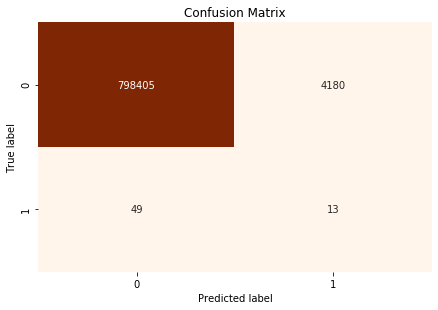

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    802585
           1       0.00      0.21      0.01        62

   micro avg       0.99      0.99      0.99    802647
   macro avg       0.50      0.60      0.50    802647
weighted avg       1.00      0.99      1.00    802647


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Size X_train = (3210585, 8)
Size X_test = (802647, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3210337, 1: 3210337})

 Decision Tree Classifier ........
classifier_accuracy = 99.49242942414287%


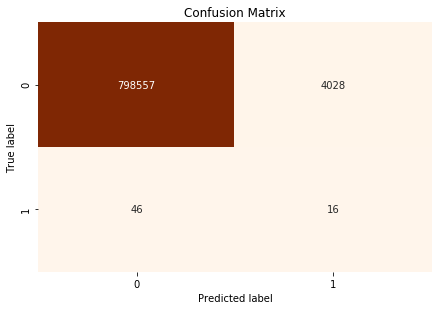

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    802585
           1       0.00      0.26      0.01        62

   micro avg       0.99      0.99      0.99    802647
   macro avg       0.50      0.63      0.50    802647
weighted avg       1.00      0.99      1.00    802647


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Size X_train = (3210586, 8)
Size X_test = (802646, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3210338, 1: 3210338})

 Decision Tree Classifier ........
classifier_accuracy = 99.91316221597067%


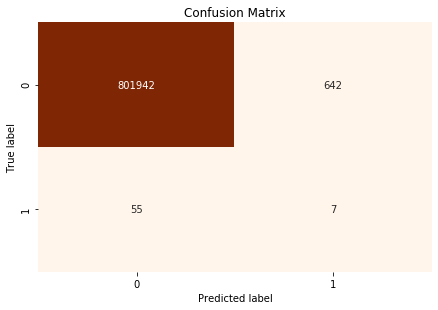

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    802584
           1       0.01      0.11      0.02        62

   micro avg       1.00      1.00      1.00    802646
   macro avg       0.51      0.56      0.51    802646
weighted avg       1.00      1.00      1.00    802646


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Size X_train = (3210586, 8)
Size X_test = (802646, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3210338, 1: 3210338})

 Decision Tree Classifier ........
classifier_accuracy = 99.77262703607818%


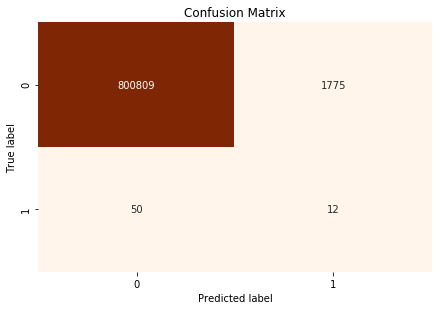

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    802584
           1       0.01      0.19      0.01        62

   micro avg       1.00      1.00      1.00    802646
   macro avg       0.50      0.60      0.51    802646
weighted avg       1.00      1.00      1.00    802646


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Size X_train = (3210586, 8)
Size X_test = (802646, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3210338, 1: 3210338})

 Decision Tree Classifier ........
classifier_accuracy = 99.09212778734336%


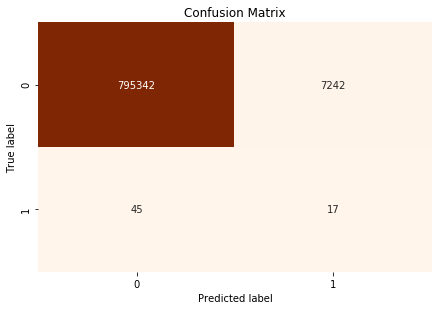

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    802584
           1       0.00      0.27      0.00        62

   micro avg       0.99      0.99      0.99    802646
   macro avg       0.50      0.63      0.50    802646
weighted avg       1.00      0.99      1.00    802646


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [72]:
for train_index, test_index in skFold.split(X, y):
    #print("TRAIN:", train_index,. "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Size X_train = " + str(X_train.shape))
    print("Size X_test = " +str(X_test.shape))
    #---------------------------------------------
    print("\n Resampling done here...")
    X_train_res, y_train_res = makeOverSamplesSMOTE(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train_res))
    #----------------------------------------------
    print("\n Decision Tree Classifier ........")
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train_res, y_train_res)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    #print(cnf_matrix)
    #class_names = [0,1]
    plt.figure()
    plot_cm(cnf_matrix)
    plt.show()
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

## Random Forest Classifier

Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.96299743224606%


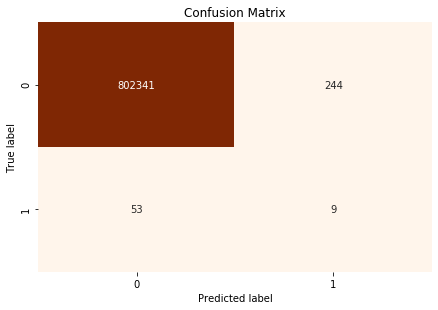

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    802585
           1       0.04      0.15      0.06        62

   micro avg       1.00      1.00      1.00    802647
   macro avg       0.52      0.57      0.53    802647
weighted avg       1.00      1.00      1.00    802647



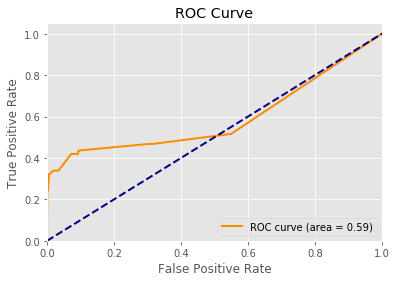


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.94393550340311%


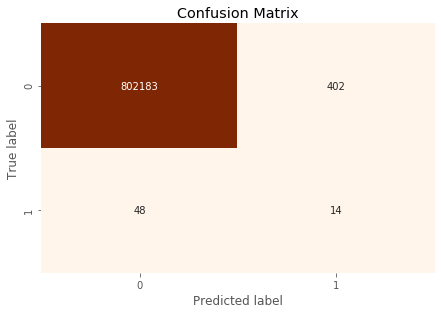

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    802585
           1       0.03      0.23      0.06        62

   micro avg       1.00      1.00      1.00    802647
   macro avg       0.52      0.61      0.53    802647
weighted avg       1.00      1.00      1.00    802647



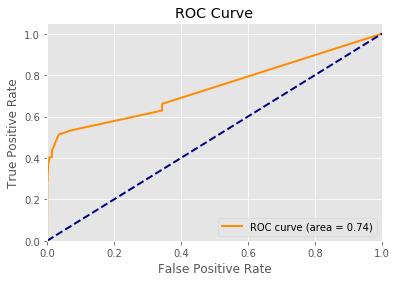


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.97994134400471%


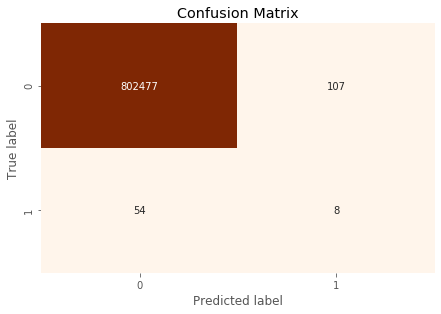

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    802584
           1       0.07      0.13      0.09        62

   micro avg       1.00      1.00      1.00    802646
   macro avg       0.53      0.56      0.55    802646
weighted avg       1.00      1.00      1.00    802646



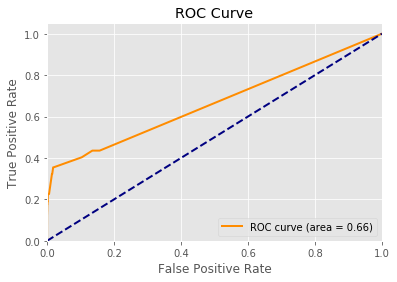


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.95303035211039%


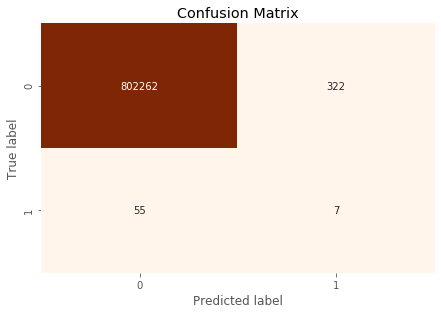

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    802584
           1       0.02      0.11      0.04        62

   micro avg       1.00      1.00      1.00    802646
   macro avg       0.51      0.56      0.52    802646
weighted avg       1.00      1.00      1.00    802646



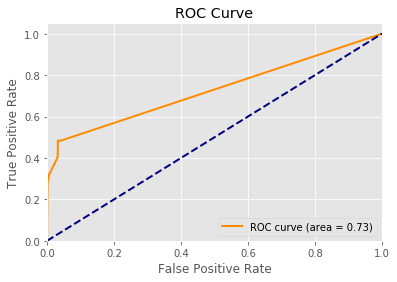


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.69264158794786%


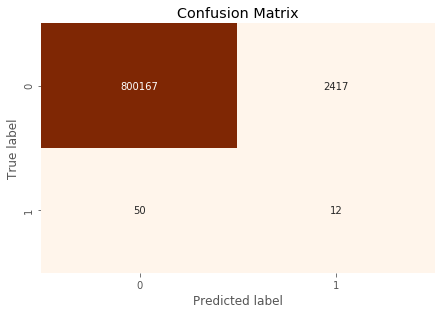

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    802584
           1       0.00      0.19      0.01        62

   micro avg       1.00      1.00      1.00    802646
   macro avg       0.50      0.60      0.50    802646
weighted avg       1.00      1.00      1.00    802646



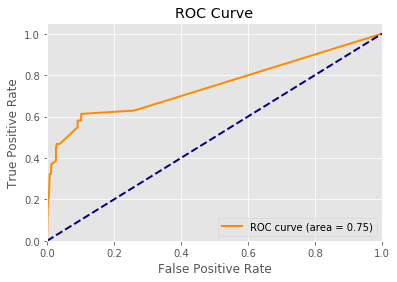


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [74]:
for train_index, test_index in skFold.split(X, y):
    #print("TRAIN:", train_index,. "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print("Size X_train = " + str(X_train.shape))
    #print("Size X_test = " +str(X_test.shape))
    print("Failed HDD in test_set '1': {}".format(sum(y_test==1)))
    #---------------------------------------------
    print("\n Resampling done here...")
    X_train_res, y_train_res = makeOverSamplesSMOTE(X_train, y_train)
    #print('Resampled dataset shape %s' % Counter(y_train_res))
    #----------------------------------------------
    print("\n RandomForest Classifier ........")
    classifier = RandomForestClassifier(n_estimators=10 ,random_state=0, n_jobs=4 )
    classifier.fit(X_train_res, y_train_res)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    #print(cnf_matrix)
    #class_names = [0,1]
    plt.figure()
    plot_cm(cnf_matrix)
    plt.show()
    print(classification_report(y_test,y_pred))
    plot_ROC(classifier, X_test, y_test)
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

# ----------------------------------------------------------------

# ----------------------------------------------------------------

## Based on the Literature
#### ('smart_5_raw', 'smart_12_raw', 'smart_187_raw', 'smart_188_raw',
#### 'smart_189_raw', 'smart_190_raw', 'smart_198_raw', 'smart_199_raw')

## Start Preprocessing here For Literature based analysis...

In [80]:
df2.columns

Index(['failure', 'smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 'smart_12_raw',
       'smart_184_raw', 'smart_187_raw', 'smart_188_raw', 'smart_189_raw',
       'smart_190_raw', 'smart_191_raw', 'smart_192_raw', 'smart_193_raw',
       'smart_194_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw',
       'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')

In [27]:
cols = ['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 
       'smart_7_raw', 'smart_9_raw', 'smart_10_raw', 
       'smart_183_raw', 'smart_184_raw', 
       'smart_191_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_195_raw', 'smart_197_raw',
       'smart_240_raw', 'smart_241_raw',
       'smart_242_raw']

In [28]:
df3 = df2.drop(columns = cols, axis=1)

In [29]:
df3.head()

,failure,smart_5_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_198_raw,smart_199_raw
0,0,0.0,8.0,0.0,0.0,0.0,24.0,0.0,0.0
1,0,0.0,19.0,0.0,1.0,0.0,19.0,0.0,0.0
2,0,0.0,7.0,0.0,0.0,0.0,30.0,0.0,0.0
3,0,0.0,1.0,0.0,0.0,0.0,27.0,0.0,0.0
4,0,0.0,2.0,0.0,0.0,0.0,39.0,0.0,0.0


In [30]:
#pd.DataFrame(data=data[1:,1:],    # values
#              index=data[1:,0],    # 1st column as index
#              columns=data[0,1:])  # 1st row as the column names
#
#dataset = pd.DataFrame({'Column1':data[:,0],'Column2':data[:,1]})
#print(dataset)

In [31]:
#axis 0, or ‘index’ : Drop rows which contain missing values.
#     1, or ‘columns’ : Drop columns which contain missing value.
df4 = df3.dropna(axis=0, how='any')

In [32]:
df4.groupby('failure').count()

,smart_5_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_198_raw,smart_199_raw
failure,,,,,,,,
0,4027441,4027441,4027441,4027441,4027441,4027441,4027441,4027441
1,311,311,311,311,311,311,311,311


In [33]:
column_names_to_normalize = ['smart_5_raw', 'smart_12_raw', 'smart_187_raw', 'smart_188_raw',
                             'smart_189_raw', 'smart_190_raw', 'smart_198_raw', 'smart_199_raw']
x = df4[column_names_to_normalize].values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df4.index)
#df4[column_names_to_normalize] = df_temp

In [34]:
df_temp.head()

,smart_5_raw,smart_12_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_198_raw,smart_199_raw
0,0.0,0.000487,0.0,0.000000e+00,0.0,0.279070,0.0,0.0
1,0.0,0.001157,0.0,5.173935e-12,0.0,0.162791,0.0,0.0
2,0.0,0.000426,0.0,0.000000e+00,0.0,0.418605,0.0,0.0
3,0.0,0.000061,0.0,0.000000e+00,0.0,0.348837,0.0,0.0
4,0.0,0.000122,0.0,0.000000e+00,0.0,0.627907,0.0,0.0


In [35]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [36]:
from sklearn.model_selection import TimeSeriesSplit, KFold, GroupKFold, StratifiedKFold
from sklearn.model_selection import ShuffleSplit, GroupShuffleSplit, StratifiedShuffleSplit

In [37]:
#Dividing the data into response variable and attributes
X = np.array(df_temp)
#y = np.array(dataframe7.loc[:, dataframe7.columns == 'failure'])
y = np.array(df4['failure'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (4027752, 8)
Shape of y: (4027752,)


## ------------------------ Stratified K-Folds cross-validator --------------------

### Running K-fold (k=5) Cross Validation for each Classifier 

In [63]:
skFold = StratifiedKFold(n_splits=5)

In [64]:
print(skFold)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [65]:
skFold.get_n_splits(X, y)

5

## Decision Tree Classifier

Size X_train = (3222200, 8)
Size X_test = (805552, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3221952, 1: 3221952})

 Decision Tree Classifier ........
classifier_accuracy = 98.70064254076708%


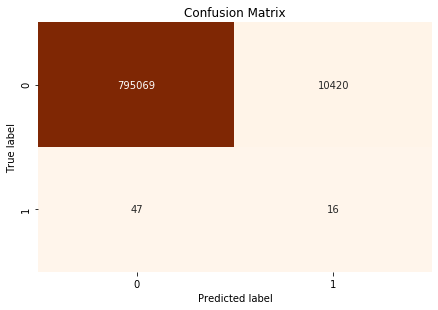

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    805489
           1       0.00      0.25      0.00        63

   micro avg       0.99      0.99      0.99    805552
   macro avg       0.50      0.62      0.50    805552
weighted avg       1.00      0.99      0.99    805552


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Size X_train = (3222202, 8)
Size X_test = (805550, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3221953, 1: 3221953})

 Decision Tree Classifier ........
classifier_accuracy = 98.5256036248526%


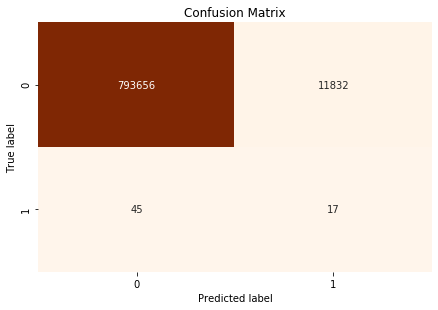

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    805488
           1       0.00      0.27      0.00        62

   micro avg       0.99      0.99      0.99    805550
   macro avg       0.50      0.63      0.50    805550
weighted avg       1.00      0.99      0.99    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Size X_train = (3222202, 8)
Size X_test = (805550, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3221953, 1: 3221953})

 Decision Tree Classifier ........
classifier_accuracy = 99.17633914716653%


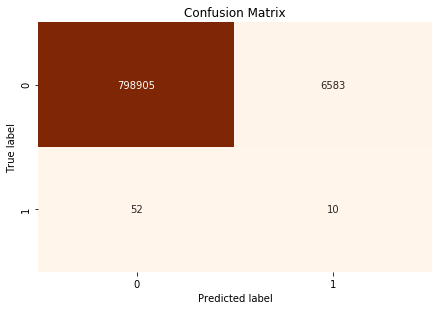

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    805488
           1       0.00      0.16      0.00        62

   micro avg       0.99      0.99      0.99    805550
   macro avg       0.50      0.58      0.50    805550
weighted avg       1.00      0.99      1.00    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Size X_train = (3222202, 8)
Size X_test = (805550, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3221953, 1: 3221953})

 Decision Tree Classifier ........
classifier_accuracy = 97.52231394699274%


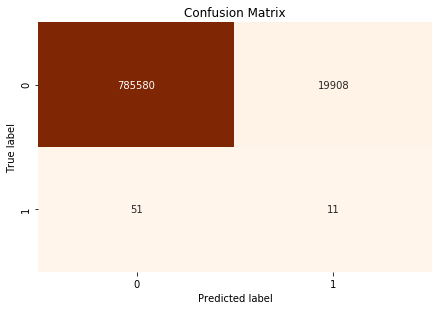

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    805488
           1       0.00      0.18      0.00        62

   micro avg       0.98      0.98      0.98    805550
   macro avg       0.50      0.58      0.49    805550
weighted avg       1.00      0.98      0.99    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Size X_train = (3222202, 8)
Size X_test = (805550, 8)

 Resampling done here...
Resampled dataset shape Counter({0: 3221953, 1: 3221953})

 Decision Tree Classifier ........
classifier_accuracy = 95.8307988330954%


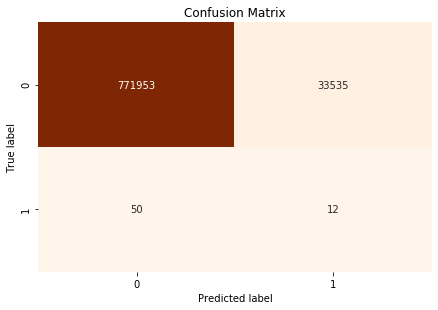

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    805488
           1       0.00      0.19      0.00        62

   micro avg       0.96      0.96      0.96    805550
   macro avg       0.50      0.58      0.49    805550
weighted avg       1.00      0.96      0.98    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [47]:
for train_index, test_index in skFold.split(X, y):
    #print("TRAIN:", train_index,. "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Size X_train = " + str(X_train.shape))
    print("Size X_test = " +str(X_test.shape))
    #---------------------------------------------
    print("\n Resampling done here...")
    X_train_res, y_train_res = makeOverSamplesSMOTE(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_train_res))
    #----------------------------------------------
    print("\n Decision Tree Classifier ........")
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train_res, y_train_res)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    #print(cnf_matrix)
    #class_names = [0,1]
    plt.figure()
    plot_cm(cnf_matrix)
    plt.show()
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

## Random Forest Classifier

Failed HDD in test_set '1': 63

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.5277772260512%


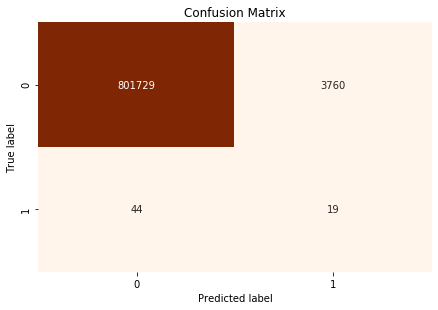

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    805489
           1       0.01      0.30      0.01        63

   micro avg       1.00      1.00      1.00    805552
   macro avg       0.50      0.65      0.50    805552
weighted avg       1.00      1.00      1.00    805552


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.82508844888585%


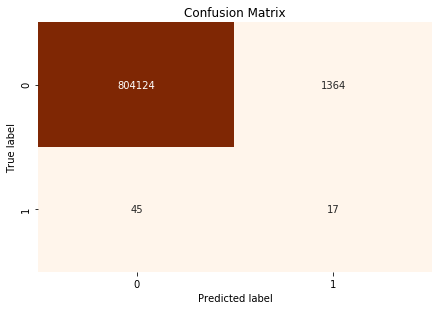

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    805488
           1       0.01      0.27      0.02        62

   micro avg       1.00      1.00      1.00    805550
   macro avg       0.51      0.64      0.51    805550
weighted avg       1.00      1.00      1.00    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.87288188194401%


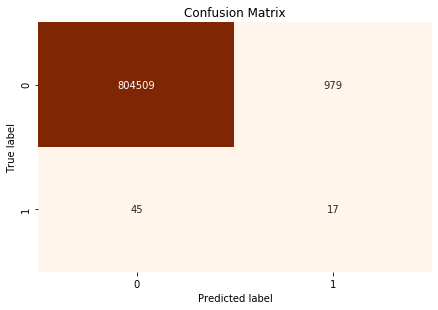

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    805488
           1       0.02      0.27      0.03        62

   micro avg       1.00      1.00      1.00    805550
   macro avg       0.51      0.64      0.52    805550
weighted avg       1.00      1.00      1.00    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.850164483893%


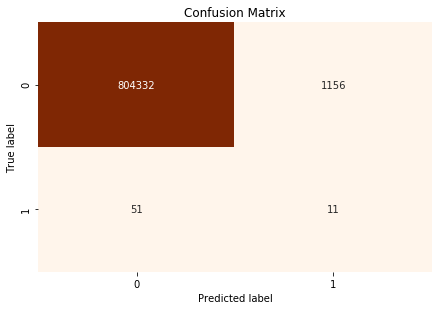

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    805488
           1       0.01      0.18      0.02        62

   micro avg       1.00      1.00      1.00    805550
   macro avg       0.50      0.59      0.51    805550
weighted avg       1.00      1.00      1.00    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 99.90143380299175%


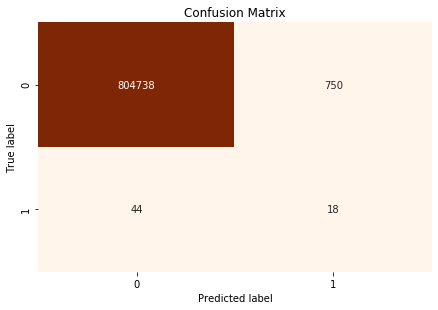

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    805488
           1       0.02      0.29      0.04        62

   micro avg       1.00      1.00      1.00    805550
   macro avg       0.51      0.64      0.52    805550
weighted avg       1.00      1.00      1.00    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [50]:
for train_index, test_index in skFold.split(X, y):
    #print("TRAIN:", train_index,. "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print("Size X_train = " + str(X_train.shape))
    #print("Size X_test = " +str(X_test.shape))
    print("Failed HDD in test_set '1': {}".format(sum(y_test==1)))
    #---------------------------------------------
    print("\n Resampling done here...")
    X_train_res, y_train_res = makeOverSamplesSMOTE(X_train, y_train)
    #print('Resampled dataset shape %s' % Counter(y_train_res))
    #----------------------------------------------
    print("\n RandomForest Classifier ........")
    classifier = RandomForestClassifier(n_estimators=10 ,random_state=0, n_jobs=4 )
    classifier.fit(X_train_res, y_train_res)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    #print(cnf_matrix)
    #class_names = [0,1]
    plt.figure()
    plot_cm(cnf_matrix)
    plt.show()
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

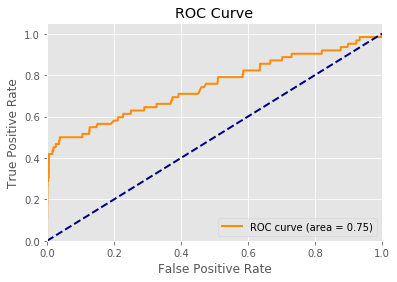

In [62]:
plt.style.use('ggplot')

y_predict_probabilities = clf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### ADA Boost Classifier

Failed HDD in test_set '1': 63

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 98.67047689038075%


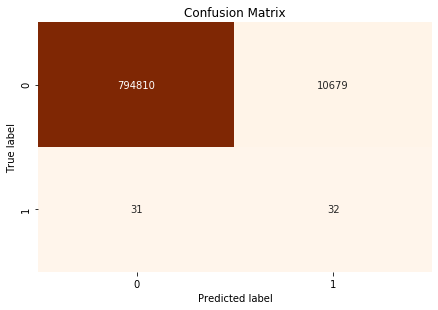

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    805489
           1       0.00      0.51      0.01        63

   micro avg       0.99      0.99      0.99    805552
   macro avg       0.50      0.75      0.50    805552
weighted avg       1.00      0.99      0.99    805552


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 98.41598907578673%


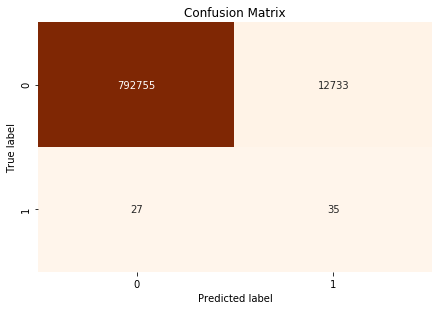

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    805488
           1       0.00      0.56      0.01        62

   micro avg       0.98      0.98      0.98    805550
   macro avg       0.50      0.77      0.50    805550
weighted avg       1.00      0.98      0.99    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 98.89665445968593%


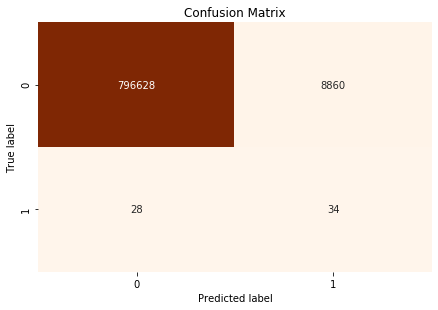

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    805488
           1       0.00      0.55      0.01        62

   micro avg       0.99      0.99      0.99    805550
   macro avg       0.50      0.77      0.50    805550
weighted avg       1.00      0.99      0.99    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 97.5435416795978%


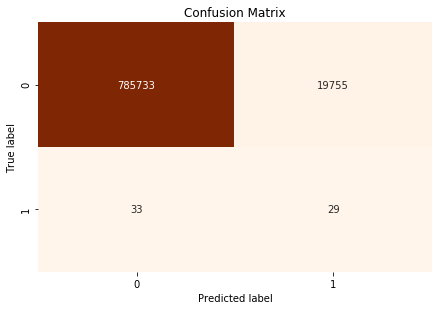

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    805488
           1       0.00      0.47      0.00        62

   micro avg       0.98      0.98      0.98    805550
   macro avg       0.50      0.72      0.50    805550
weighted avg       1.00      0.98      0.99    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Failed HDD in test_set '1': 62

 Resampling done here...

 RandomForest Classifier ........
classifier_accuracy = 98.76010179380548%


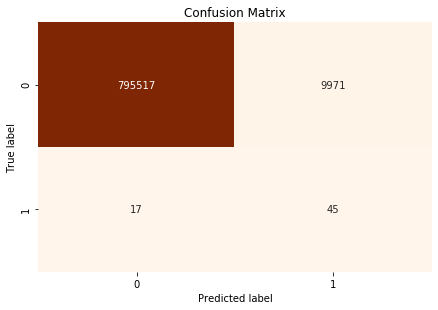

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    805488
           1       0.00      0.73      0.01        62

   micro avg       0.99      0.99      0.99    805550
   macro avg       0.50      0.86      0.50    805550
weighted avg       1.00      0.99      0.99    805550


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [52]:
for train_index, test_index in skFold.split(X, y):
    #print("TRAIN:", train_index,. "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print("Size X_train = " + str(X_train.shape))
    #print("Size X_test = " +str(X_test.shape))
    print("Failed HDD in test_set '1': {}".format(sum(y_test==1)))
    #---------------------------------------------
    print("\n Resampling done here...")
    X_train_res, y_train_res = makeOverSamplesSMOTE(X_train, y_train)
    #print('Resampled dataset shape %s' % Counter(y_train_res))
    #----------------------------------------------
    print("\n ADA Boost Classifier ........")
    classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
    classifier.fit(X_train_res, y_train_res)
    classifier_accuracy = classifier.score(X_test,y_test)
    print("classifier_accuracy = {}%".format(classifier_accuracy*100))
    #----------------------------------------------
    y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    #print(cnf_matrix)
    #class_names = [0,1]
    plt.figure()
    plot_cm(cnf_matrix)
    plt.show()
    print(classification_report(y_test,y_pred))
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [64]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.10')

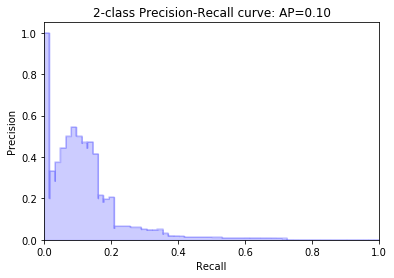

In [65]:
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

#print('Average precision-recall score: {0:0.2f}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

## Analysis was run using different Over-sampling techniques with Classification algorithmns

### SMOTE with Random Forest classifier generated reasonable results when compared with other algorithmns

### For Seagate hard drive RFE based analysis and Literature based analysis produced same-like results